### ML PROJECT I : CREDIT CARD

#### Import Basic Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install mlxtend

In [3]:
!pip install xgboost

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score 
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA

#### Exploratory Data Analysis 

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()*100/df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [9]:
dt = list(df[((df.isnull().sum(axis=1)/df.shape[1])*100)>5].index)
print(dt)

[]


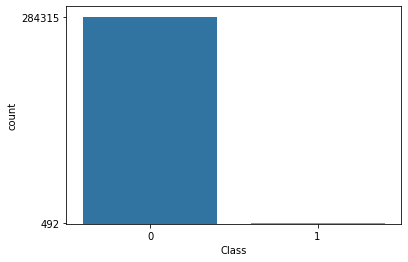

In [10]:
sns.countplot(data=df,x="Class")
count = df["Class"].value_counts()
plt.yticks(count)
plt.show()

- StandardScalar

In [11]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

In [12]:
df.drop(['Time'],axis=1,inplace=True)

In [13]:
df.shape

(284807, 30)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(275663, 30)

In [16]:
X = df.drop('Class',axis=1).values
Y = df['Class'].values

#### Sampling Technique
- RandomOverSampler

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [18]:
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print('Confusion Matrix :')
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [19]:
ros = RandomOverSampler()

In [20]:
X_train1,Y_train1 = ros.fit_resample(X_train,Y_train)

In [21]:
X_test1,Y_test1 = ros.fit_resample(X_test,Y_test)

In [22]:
lr = LogisticRegression()

In [23]:
lr = create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.82      0.56      0.67       128

    accuracy                           1.00     68916
   macro avg       0.91      0.78      0.83     68916
weighted avg       1.00      1.00      1.00     68916

Confusion Matrix :
[[68772    16]
 [   56    72]]


In [24]:
lr.fit(X_train1,Y_train1)

LogisticRegression()

In [25]:
Y_pred = lr.predict(X_test1)

In [26]:
print(classification_report(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     68788
           1       0.98      0.91      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.94      0.94      0.94    137576
weighted avg       0.94      0.94      0.94    137576



In [27]:
def create_model1(model1):
    model1.fit(X_train1,Y_train1)
    Y_pred1=model1.predict(X_test1)
    print(classification_report(Y_test1,Y_pred1))
    print('Confustion Matrix')
    print(confusion_matrix(Y_test1,Y_pred1))
    return model1

In [28]:
lr = LogisticRegression()

In [29]:
lr = create_model1(lr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     68788
           1       0.98      0.91      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.94      0.94      0.94    137576
weighted avg       0.94      0.94      0.94    137576

Confustion Matrix
[[67191  1597]
 [ 6395 62393]]


###### After analyzing our dataset, we can conclude that we need to use Classification Algorithm Techniques, since the target varable 'Class' is in binary form i.e 0 or 1.

### Classification Techniques
- DecisionTreeClassifier - Gini Index

In [30]:
dt = DecisionTreeClassifier()

In [31]:
dt = create_model1(dt)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     68788
           1       1.00      0.71      0.83     68788

    accuracy                           0.85    137576
   macro avg       0.89      0.85      0.85    137576
weighted avg       0.89      0.85      0.85    137576

Confustion Matrix
[[68757    31]
 [20216 48572]]


- DecisionTreeClassifier - Entropy

In [32]:
dt1 = DecisionTreeClassifier(max_depth=4,criterion="entropy") 

In [33]:
dt1 = create_model1(dt1)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     68788
           1       0.96      0.82      0.88     68788

    accuracy                           0.89    137576
   macro avg       0.90      0.89      0.89    137576
weighted avg       0.90      0.89      0.89    137576

Confustion Matrix
[[66206  2582]
 [12155 56633]]


#### Naive Aggregation

In [34]:
# create a list of classification techniques and check the score

lr = LogisticRegression()
dt2 = DecisionTreeClassifier() # by-default method Gini Index
dt3 = DecisionTreeClassifier(criterion="entropy")

In [35]:
model_list=[('Logistic',lr),('Decision_Tree_Gini',dt2),('Decision_Tree_Entropy',dt3)]

- Hard Voting

In [36]:
vc1 = VotingClassifier(estimators=model_list)

In [37]:
model = create_model1(vc1)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     68788
           1       1.00      0.75      0.86     68788

    accuracy                           0.88    137576
   macro avg       0.90      0.88      0.87    137576
weighted avg       0.90      0.88      0.87    137576

Confustion Matrix
[[68762    26]
 [17040 51748]]


- Soft Voting

In [38]:
vc2 = VotingClassifier(estimators=model_list,voting="soft")

In [39]:
model = create_model1(vc2)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     68788
           1       1.00      0.76      0.86     68788

    accuracy                           0.88    137576
   macro avg       0.90      0.88      0.88    137576
weighted avg       0.90      0.88      0.88    137576

Confustion Matrix
[[68763    25]
 [16407 52381]]


#### Bootstrapping
- Bagging

In [40]:
bc = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=50,random_state=1)

In [41]:
model = create_model1(bc)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     68788
           1       0.98      0.88      0.93     68788

    accuracy                           0.93    137576
   macro avg       0.94      0.93      0.93    137576
weighted avg       0.94      0.93      0.93    137576

Confustion Matrix
[[67773  1015]
 [ 8496 60292]]


- Pasting

In [42]:
bc1 = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=500,random_state=1,bootstrap=False)

In [43]:
model = create_model1(bc1)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     68788
           1       0.97      0.92      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.95      0.94      0.94    137576
weighted avg       0.95      0.94      0.94    137576

Confustion Matrix
[[66964  1824]
 [ 5825 62963]]


- RandomForestClassifier

In [44]:
rf = RandomForestClassifier(max_depth = 4)

In [45]:
rf = create_model1(rf)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     68788
           1       0.99      0.84      0.91     68788

    accuracy                           0.92    137576
   macro avg       0.93      0.92      0.92    137576
weighted avg       0.93      0.92      0.92    137576

Confustion Matrix
[[68490   298]
 [11144 57644]]


#### Stacking

In [46]:
lr = LogisticRegression()
dt2 = DecisionTreeClassifier() # by-default Gini Index
dt3 = DecisionTreeClassifier(criterion="entropy")

In [47]:
model_list = [lr,dt1,dt2]

In [48]:
meta = LogisticRegression()

In [49]:
sc = StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [50]:
model = create_model1(sc)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     68788
           1       1.00      0.71      0.83     68788

    accuracy                           0.85    137576
   macro avg       0.89      0.85      0.85    137576
weighted avg       0.89      0.85      0.85    137576

Confustion Matrix
[[68763    25]
 [20222 48566]]


#### ADA Boosting

In [51]:
ada = AdaBoostClassifier(n_estimators=100)

In [52]:
model = create_model1(ada)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     68788
           1       0.99      0.85      0.91     68788

    accuracy                           0.92    137576
   macro avg       0.93      0.92      0.92    137576
weighted avg       0.93      0.92      0.92    137576

Confustion Matrix
[[68289   499]
 [10649 58139]]


#### Extreme Gradient Boosting

In [53]:
xgb = XGBClassifier(max_depth = 4)

In [54]:
xgb = create_model1(xgb)

[22:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     68788
           1       1.00      0.81      0.89     68788

    accuracy                           0.90    137576
   macro avg       0.92      0.90      0.90    137576
weighted avg       0.92      0.90      0.90    137576

Confustion Matrix
[[68772    16]
 [13312 55476]]


#### Support Vector Machine
- Hard Margin

In [55]:
svc = LinearSVC(random_state=3)

In [56]:
svc = create_model1(svc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68788
           1       0.98      0.91      0.95     68788

    accuracy                           0.95    137576
   macro avg       0.95      0.95      0.95    137576
weighted avg       0.95      0.95      0.95    137576

Confustion Matrix
[[67377  1411]
 [ 5871 62917]]


- Soft Margin

In [57]:
svc = LinearSVC(random_state=1,C=0.05)

In [58]:
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68788
           1       0.98      0.91      0.95     68788

    accuracy                           0.95    137576
   macro avg       0.95      0.95      0.95    137576
weighted avg       0.95      0.95      0.95    137576

Confustion Matrix
[[67459  1329]
 [ 5871 62917]]


#### Feature Selection Techniques
- Correlation Coefficient

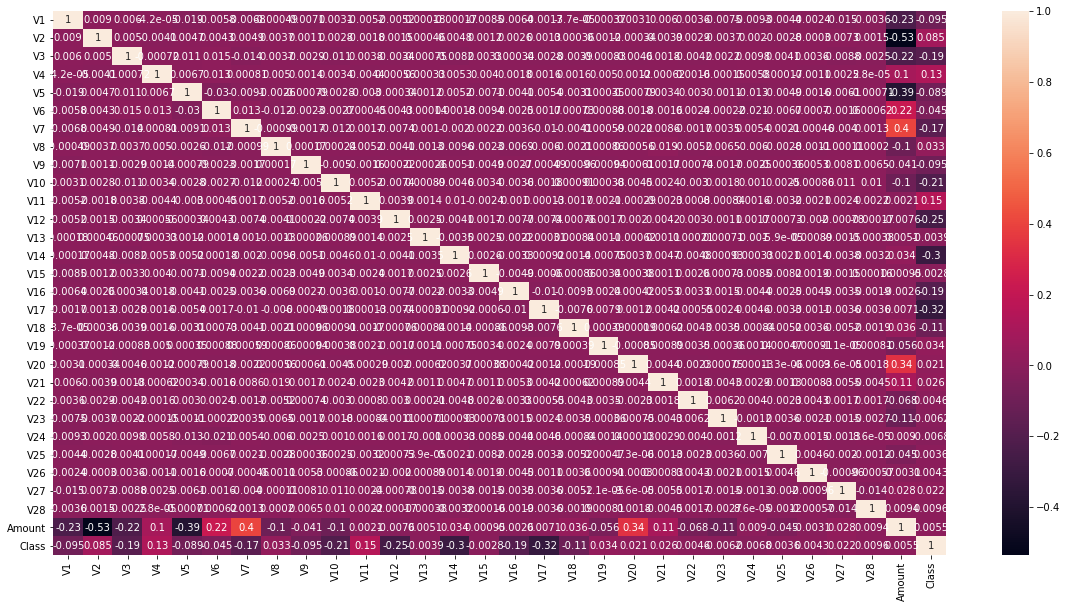

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

- ANOVA Test

In [60]:
anova = SelectKBest(score_func=f_regression,k=15)

In [61]:
X_train_imp = anova.fit_transform(X_train1,Y_train1)
X_test_imp = anova.transform(X_test1)

In [62]:
anova.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [63]:
lr1=LinearRegression()

In [64]:
lr1.fit(X_train_imp,Y_train1)

LinearRegression()

In [65]:
lr1.score(X_test_imp,Y_test1)

0.6104101638766616

###### Since, there are negative values in our dataset, we cannot apply Chi-Square Test

- Wrapping Method

In [66]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338556,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333279,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190107,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.019392,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338516,0


In [67]:
X = df.drop('Class',axis=1) #input variable
Y = df['Class']

In [68]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [69]:
columns = []
for col in X:
    columns.append(col)
    print(columns)

['V1']
['V1', 'V2']
['V1', 'V2', 'V3']
['V1', 'V2', 'V3', 'V4']
['V1', 'V2', 'V3', 'V4', 'V5']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17']
['V1', 'V2', 'V3', 'V4', 'V5'

- Forward Selection

In [70]:
columns = []
for col in X:
    columns.append(col)
    X_new = df[columns]
    X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_new,Y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train1,Y_train1)
    score = lr.score(X_test1,Y_test1)
    print('Column : ',col, ' Score : ',score)

Column :  V1  Score :  0.008049906445355859
Column :  V2  Score :  0.014829607693038871
Column :  V3  Score :  0.04502740013687734
Column :  V4  Score :  0.06019298100028847
Column :  V5  Score :  0.06522999576923483
Column :  V6  Score :  0.0680427439509651
Column :  V7  Score :  0.09684045771734884
Column :  V8  Score :  0.09718457050136098
Column :  V9  Score :  0.10542103493340127
Column :  V10  Score :  0.1460189194123267
Column :  V11  Score :  0.1641484840016324
Column :  V12  Score :  0.22215649325142683
Column :  V13  Score :  0.22216008661679054
Column :  V14  Score :  0.3094888205167051
Column :  V15  Score :  0.30949873863221244
Column :  V16  Score :  0.34223496499037975
Column :  V17  Score :  0.4375220767652669
Column :  V18  Score :  0.4488758376098295
Column :  V19  Score :  0.449713406048721
Column :  V20  Score :  0.4500743086584965
Column :  V21  Score :  0.45113855287094207
Column :  V22  Score :  0.4511456397536001
Column :  V23  Score :  0.45115701418291343
Colum

- Backward Selection

In [71]:
columns = []
X_new = X
n_col = X_new.shape[1]
for i in range(n_col,0,-1): 
    columns.append(X_new)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X_new,Y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train1,y_train1)
    score1 = lr.score(X_test1,y_test1)
    print('Column : ',i, 'Score : ',score1)
    X_new = X_new.iloc[:,:-1]
    print('After Remove Column : ', i)

Column :  29 Score :  0.45182699027318207
After Remove Column :  29
Column :  28 Score :  0.451510022390316
After Remove Column :  28
Column :  27 Score :  0.4514188657712783
After Remove Column :  27
Column :  26 Score :  0.4512551616437064
After Remove Column :  26
Column :  25 Score :  0.45123373598424366
After Remove Column :  25
Column :  24 Score :  0.451215008019615
After Remove Column :  24
Column :  23 Score :  0.45115701418291343
After Remove Column :  23
Column :  22 Score :  0.4511456397536001
After Remove Column :  22
Column :  21 Score :  0.45113855287094207
After Remove Column :  21
Column :  20 Score :  0.4500743086584965
After Remove Column :  20
Column :  19 Score :  0.449713406048721
After Remove Column :  19
Column :  18 Score :  0.4488758376098295
After Remove Column :  18
Column :  17 Score :  0.4375220767652669
After Remove Column :  17
Column :  16 Score :  0.34223496499037975
After Remove Column :  16
Column :  15 Score :  0.30949873863221244
After Remove Colum

- Lasso Regularization

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(X_train1,Y_train1)

LinearRegression()

In [74]:
training_score = lr.score(X_train1,Y_train1)
print('Training Score : ',training_score)

Training Score :  0.009376512025333739


In [75]:
testing_score = lr.score(X_test1,Y_test1)
print('Testing Score : ',testing_score)

Testing Score :  0.008049906445355859


In [76]:
m = lr.coef_
m = np.round(m,2)
print(m)

[-0.]


In [77]:
lr.intercept_

0.0016287509182190832

In [78]:
l1 = Lasso(1000)
l1.fit(X_train1,Y_train1)

Lasso(alpha=1000)

In [79]:
l1.coef_

array([-0.])

In [80]:
m = lr.coef_
a  =[]
for i in m:
    i = np.round(i,2)
    a.append(i)
print(a)

[-0.0]


In [81]:
m1 = l1.coef_
b = []
for i in m1:
    i = np.round(i,3)
    b.append(i)
print(b)

[-0.0]


In [82]:
c = X.columns
L = list(zip(c,a,b))

df1 = pd.DataFrame(L, columns=['Column','Original_Slope','Lasso_Slope'])
df1

,Column,Original_Slope,Lasso_Slope
0,V1,-0.0,-0.0


In [83]:
print('Score : ')
for i in range(200,1001,50):
    l1 = Lasso(i)
    l1.fit(X_train1,Y_train1)
    score = l1.score(X_test1,Y_test1)
    print(np.round(score,2))

Score : 
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0


#### Principal Component Analysis

In [84]:
pca = PCA(n_components=1,random_state=1)
X_train_pca = pca.fit_transform(X_train1,Y_train1)

In [85]:
X_test_pca = pca.transform(X_test1)

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(X_train_pca,Y_train1)

LinearRegression()

In [88]:
lr.score(X_test_pca,Y_test1)

0.008049906445355859

###### Support Vector Machine Algorithm provides the best score and accuracy compared to all other algorithms. Our model overfitting problem is also resolved.
- Precision = 98%
- Recall = 92%
- F1-score = 95%
- Accuracy = 95%